In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob 
import pandas as pd
import seaborn as sns


(4, 3, 10)


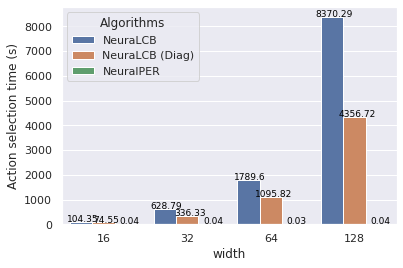

In [7]:
data = 'quadratic'
result_path = os.path.join('/scratch/tnguy258/neuralofflinerl-2/m-effect/mu_eps=0.5/')
algos = [ 'NeuraLCB', 'NeuraLCBDiag', 'NeuralPER'] 
algos_labels = [ 'NeuraLCB', 'NeuraLCB (Diag)', 'NeuralPER'] 

hidden_sizes = [16, 32, 64, 128]

T = -1

res_per_hidden = [] # (h, algo, T)
data_frs = []
agg_data = []
for hidden_size in hidden_sizes: 
    res_per_algo = []
    agg_data_per_algo = []
    for k, algo in enumerate(algos): 
        data_path = os.path.join(result_path, data, 'm={}'.format(hidden_size), algo)
        tmp = np.load(os.path.join(data_path, 'trial=0.npz'))['arr_2'][:,1]
        res_per_algo.append( tmp)
        # print(tmp)
        if algo == 'NeuralPER':
            data_frs.append([hidden_size, algos_labels[k], np.mean(tmp)])
            agg_data_per_algo.append(np.mean(tmp)) 

        else:
            data_frs.append([hidden_size, algos_labels[k], tmp[T]])
            agg_data_per_algo.append(tmp[T]) 

    res_per_hidden.append(res_per_algo) 
    agg_data.append(agg_data_per_algo)

res_per_hidden = np.array(res_per_hidden) # (h, algo,t)

print(res_per_hidden.shape)

labels = ['width={}'.format(m) for m in hidden_sizes] 

sns.set(font_scale=1)

df = pd.DataFrame(data_frs, columns=['width', 'Algorithms', 'Action selection time (s)'])
g = sns.barplot(data=df, x='width', y='Action selection time (s)', hue='Algorithms')

# g.grid('on')
for i in range(len(hidden_sizes)): 
    for j in range(len(algos)):
        
        g.text( -0.25 + j*0.28 + i , int(agg_data[i][j]) + 10 , round(agg_data[i][j], 2), color='black', ha='center', fontsize=9)
# plt.bar(labels, res_per_hidden[:,2,-1])

(4, 3, 4)
    width            cands           mu         std
0   ind=0         NeuraLCB    60.127424    5.056740
1   ind=1         NeuraLCB   226.207760   42.991530
2   ind=2         NeuraLCB   778.338687   82.785548
3   ind=3         NeuraLCB  4683.672923  442.763267
4   ind=0  NeuraLCB (Diag)    32.779662    3.092071
5   ind=1  NeuraLCB (Diag)    95.213520   18.670473
6   ind=2  NeuraLCB (Diag)   417.113195   80.649785
7   ind=3  NeuraLCB (Diag)  2359.802330  217.155652
8   ind=0        NeuralPER     0.019845    0.004713
9   ind=1        NeuralPER     0.023801    0.009202
10  ind=2        NeuralPER     0.023025    0.002075
11  ind=3        NeuralPER     0.027762    0.011340


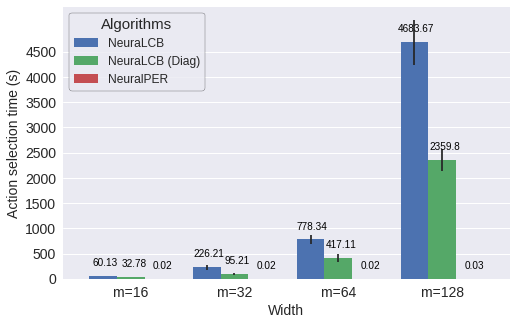

In [2]:
data = 'quadratic'
result_path = os.path.join('/scratch/tnguy258/neuralofflinerl-2/m-effect/mu_eps=0.5/')
algos = [ 'NeuraLCB', 'NeuraLCBDiag', 'NeuralPER'] 
algos_labels = [ 'NeuraLCB', 'NeuraLCB (Diag)', 'NeuralPER'] 

hidden_sizes = [16, 32, 64, 128]

T = 5 # -1
n = 5
xtickers = ['m={}'.format(m) for m in hidden_sizes]

res_per_hidden = [] # (h, algo, trial)
# data_frs = []
agg_data = []
for j,hidden_size in enumerate(hidden_sizes): 
    res_per_algo = []
    agg_data_per_algo = []
    for k, algo in enumerate(algos): 
        data_path = os.path.join(result_path, data, 'm={}'.format(hidden_size), algo)
        data_per_trial = []
        for trial in range(n):
            tmp = np.load(os.path.join(data_path, 'trial={}.npz'.format(trial)))['arr_2'][:,1][T]
            data_per_trial.append(tmp)
        res_per_algo.append( data_per_trial)
 
        # data_frs.append([hidden_size, algos_labels[k], tmp[T]])
        agg_data_per_algo.append(np.mean(np.array(data_per_trial))) 

    res_per_hidden.append(res_per_algo) 
    agg_data.append(agg_data_per_algo)

res_per_hidden = np.array(res_per_hidden) # (h, algo,t)

print(res_per_hidden.shape)

mu = np.mean(res_per_hidden, axis=-1).T.ravel() # (h, a) 
std = np.std(res_per_hidden, axis=-1).T.ravel() / np.sqrt(res_per_hidden.shape[-1]) # (h,a)

n_groups = len(hidden_sizes)
n_cands = len(algos) 
group = ['ind={}'.format(m) for  i in range(n_cands) for m in range(len(hidden_sizes))]
cands = [a for a in algos_labels for i in range(n_groups)]
# print(group)
# print(cands)
# print(mu)
# print(std)

data = {'width': group,
        'cands': cands,
        'mu': mu,
        'std': std}
df = pd.DataFrame(data)

print(df)

vals = df.pivot(index='width', columns='cands', values='mu')
yerr = df.pivot(index='width', columns='cands', values='std')

plt.style.use('seaborn')
# fig = plt.figure(figsize=(6, 4))

# plot vals with yerr
ax = vals.plot(kind='bar', yerr=yerr, logy=False, figsize=(8, 5), rot=0, width=0.8,\
    sort_columns=False, fontsize=14)
_ = ax.legend(title='Algorithms', loc='upper left', edgecolor='black', fontsize=12, \
    title_fontsize=15,fancybox=True, frameon=True)

ax.set_xticklabels(xtickers)
ax.set_yticks(np.array([500 * i for i in range(10)]))
# ax.set_yticklabels(np.arange(0, 10, 5000))


for i in range(len(hidden_sizes)): 
    for j in range(len(algos)):
        
        ax.text( -0.25 + j*0.28 + i , int(agg_data[i][j]) + 200 , round(agg_data[i][j], 2), color='black', ha='center', fontsize=10)

ax.set_ylabel('Action selection time (s)', fontsize=14)
ax.set_xlabel('Width', fontsize=14)

ax.grid(axis='x')



# plt.gca().invert_xaxis()

# _ = ax.legend(title='Sample Set', bbox_to_anchor=(1, 1.02), loc='upper left')



In [97]:
fname = os.path.join(result_path, 'quadratic', 'quadratic_elapsed_time_vs_m.png')
ax.figure.savefig(fname, bbox_inches='tight', dpi=400)